# **DNN Classifier Estimator**

In [ ]:
import tensorflow as tf

In [ ]:
from sklearn import datasets

In [ ]:
digits = datasets.load_digits()

<Figure size 72x72 with 0 Axes>

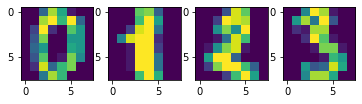

In [ ]:
# Ploting sample image 
import matplotlib.pyplot as plt
plt.figure(figsize=(1, 1))
fig, ax = plt.subplots(1, 4)
ax[0].imshow(digits.images[0])
ax[1].imshow(digits.images[1])
ax[2].imshow(digits.images[2])
ax[3].imshow(digits.images[3])
plt.show()

## **Preprocessing Data**

In [ ]:
# reshape the data to two dimensions
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [ ]:
data.shape

(1797, 64)

In [ ]:
# split into training/testing 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.5, shuffle=False)

## **Defining Input Function**

In [ ]:
# create column names for our model input function 
columns = ['p_' + str(i) for i in range(1, 65)]

In [ ]:
feature_columns = []
for col in columns:
  feature_columns.append(tf.feature_column.numeric_column(key=col))

In [ ]:
def input_fn(features, labels, training=True, batch_size=32):
  # converts inputs to a dataset
  dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))
  # shufle and repeat in a training mode 
  if training:
    dataset = dataset.shuffle(1000).repeat()

  # giving inputs in batches for training
  return dataset.batch(batch_size)

## **Create DNNClassifier Estimator instance**

In [ ]:
classifier = tf.estimator.DNNClassifier(hidden_units= [256, 128, 64], feature_columns= feature_columns, optimizer='Adagrad', n_classes=10, model_dir='classifier' )

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'classifier', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


## **Adding extra hidden layer**

In [ ]:
"""
    classifier = tf.estimator.DNNClassifier(hidden_units= [256, 128, 64, 32], feature_columns= feature_columns, optimizer='Adagrad', n_classes=10, model_dir='classifier' )

"""

"\n    classifier = tf.estimator.DNNClassifier(hidden_units= [256, 128, 64, 32], feature_columns= feature_columns, optimizer='Adagrad', n_classes=10, model_dir='classifier' )\n\n"

In [ ]:
"""
    classifier = tf.estimator.DNNClassifier(hidden_units= [256, 128, 64], feature_columns= feature_columns, optimizer='Adagrad', n_classes=10, dropout=0.2 model_dir='classifier' )

"""

## **Model Training**

In [ ]:
# create dataframes for training
import pandas as pd
dftrain = pd.DataFrame(X_train, columns=columns)

In [ ]:
classifier.train(input_fn = lambda:input_fn(dftrain, y_train, training=True), steps=2000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into classifier/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 4.797492, step = 0
INFO:tensorflow:global_step/sec: 217.447
INFO:tensorflow:loss = 0.4909833, step = 100 (0.465 sec)
INFO:tensorflow:global_step/sec: 289.741
INFO:tensorflow:loss = 0.38676766, step = 200 (0.342 sec)
INFO:tensorflow:global_step/sec: 297.

## **Model Evaluation**

In [ ]:
# create dataframe for evaluation
dftest = pd.DataFrame(X_test, columns=columns)

In [ ]:
eval_result = classifier.evaluate(
    input_fn = lambda:input_fn(dftest, y_test, training=False)
)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-02-09T08:03:38Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from classifier/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.61762s
INFO:tensorflow:Finished evaluation at 2021-02-09-08:03:39
INFO:tensorflow:Saving dict for global step 2000: accuracy = 0.9265851, average_loss = 0.23531626, global_step = 2000, loss = 0.22903527
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 2000: classifier/model.ckpt-2000


In [ ]:
eval_result

{'accuracy': 0.9265851,
 'average_loss': 0.23531626,
 'global_step': 2000,
 'loss': 0.22903527}

In [ ]:
%load_ext tensorboard 
%tensorboard --logdir ./classifier

In [ ]:
columns

['p_1',
 'p_2',
 'p_3',
 'p_4',
 'p_5',
 'p_6',
 'p_7',
 'p_8',
 'p_9',
 'p_10',
 'p_11',
 'p_12',
 'p_13',
 'p_14',
 'p_15',
 'p_16',
 'p_17',
 'p_18',
 'p_19',
 'p_20',
 'p_21',
 'p_22',
 'p_23',
 'p_24',
 'p_25',
 'p_26',
 'p_27',
 'p_28',
 'p_29',
 'p_30',
 'p_31',
 'p_32',
 'p_33',
 'p_34',
 'p_35',
 'p_36',
 'p_37',
 'p_38',
 'p_39',
 'p_40',
 'p_41',
 'p_42',
 'p_43',
 'p_44',
 'p_45',
 'p_46',
 'p_47',
 'p_48',
 'p_49',
 'p_50',
 'p_51',
 'p_52',
 'p_53',
 'p_54',
 'p_55',
 'p_56',
 'p_57',
 'p_58',
 'p_59',
 'p_60',
 'p_61',
 'p_62',
 'p_63',
 'p_64']

In [ ]:
feature_columns

[NumericColumn(key='p_1', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='p_2', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='p_3', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='p_4', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='p_5', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='p_6', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='p_7', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='p_8', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='p_9', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='p_10', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='p_11', sh

In [ ]:
dftrain.head()

,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10,p_11,p_12,p_13,p_14,p_15,p_16,p_17,p_18,p_19,p_20,p_21,p_22,p_23,p_24,p_25,p_26,p_27,p_28,p_29,p_30,p_31,p_32,p_33,p_34,p_35,p_36,p_37,p_38,p_39,p_40,p_41,p_42,p_43,p_44,p_45,p_46,p_47,p_48,p_49,p_50,p_51,p_52,p_53,p_54,p_55,p_56,p_57,p_58,p_59,p_60,p_61,p_62,p_63,p_64
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


## **Predicting unseen data**

In [ ]:
# An input function for prediction
def pred_input(features, batch_size=32):
  # Convert the inputs to a Dataset without labels
  return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batc)